# Set up notebook

In [1]:
%load_ext rpy2.ipython

## r libraries

In [14]:
%%R
library(dplyr)
library(Seurat)
library(patchwork)
library(data.table)
library(DropletUtils)
library(scRNAseq)
library(scater)
library(scran)
library(PCAtools)
library(SoupX)
library(celda)
#library(EmptyDrops)
set.seed(110010101)

path_to <- "VEX1_RNAi_2_count6/outs/"

In [15]:
%%R
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux

Matrix products: default
BLAS/LAPACK: /cluster/home/mtinti/miniconda3/envs/seurat2/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_GB.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_GB.UTF-8        LC_COLLATE=en_GB.UTF-8    
 [5] LC_MONETARY=en_GB.UTF-8    LC_MESSAGES=en_GB.UTF-8   
 [7] LC_PAPER=en_GB.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_GB.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    tools     stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] celda_1.10.0                SoupX_1.5.2                
 [3] PCAtools_2.6.0              ggrepel_0.9.1              
 [5] scran_1.22.1                scater_1.22.0              
 [7] ggplot2_3.3.5               scuttle_1.4.0              
 [9] scRNAseq_2.8.0  

## python libraries

In [3]:
#!conda env export > environment.yml

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

path_to = "VEX1_RNAi_2_count6/outs/"

## Estimate and remove Background

R[write to console]: Loading raw count data

R[write to console]: Loading cell-only count data

R[write to console]: Loading extra analysis data where available

R[write to console]: 5 genes passed tf-idf cut-off and 4 soup quantile filter.  Taking the top 4.

R[write to console]: Using 10 independent estimates of rho.

R[write to console]: Estimated global rho of 0.32

R[write to console]: Estimated contamination is very high (0.32).

R[write to console]: Expanding counts from 8 clusters to 6762 cells.



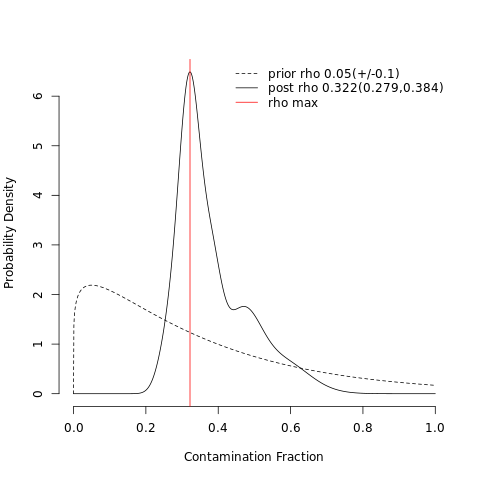

In [5]:
%%R
library(SoupX)
sce = load10X('VEX1_RNAi_2_count6/outs/')
sce = autoEstCont(sce, tfidfMin=0.85, forceAccept=TRUE)#, priorRhoStdDev = 0.3
out = adjustCounts(sce, roundToInt=TRUE)

In [6]:
%%R
head(sce$soupProfile[order(sce$soupProfile$est, decreasing = TRUE), ], n = 20)
#head(sce$soupProfile)

                             est counts
vsg-2-Tb427.BES40.22 0.036456257  63564
rRNA-Tb927.2.1975    0.012574208  21924
Tb927.1.2390         0.004678335   8157
Tb927.5.1810         0.004315860   7525
Tb11.v5.0498         0.002309057   4026
Tb927.5.810          0.001885214   3287
maxic-12S            0.001808933   3154
Tb11.1810b           0.001710859   2983
Tb11.v5.0381         0.001612784   2812
Tb927.2.370          0.001586975   2767
Tb927.10.8940        0.001434988   2502
Tb927.6.560          0.001413193   2464
Tb11.v5.0632         0.001395414   2433
gene-Tb427.BES40.3   0.001371899   2392
Tb927.5.1610         0.001320854   2303
Tb927.11.9590        0.001297339   2262
rRNA-Tb927.6.187     0.001261780   2200
Tb927.3.3270         0.001240559   2163
Tb927.6.4280         0.001216470   2121
Tb927.9.12570        0.001175176   2049


In [7]:
#Tb927.1.2390 beta tubulin
#Tb927.1.2390 ysosomal/endosomal membrane protein p67
#Tb11.v5.0498 lysosomal alpha-mannosidase precursor, putative
#Tb927.10.8940 flagellum targeting protein kharon1, putative
#Tb927.3.3270 ATP-dependent 6-phosphofructokinase, glycosomal

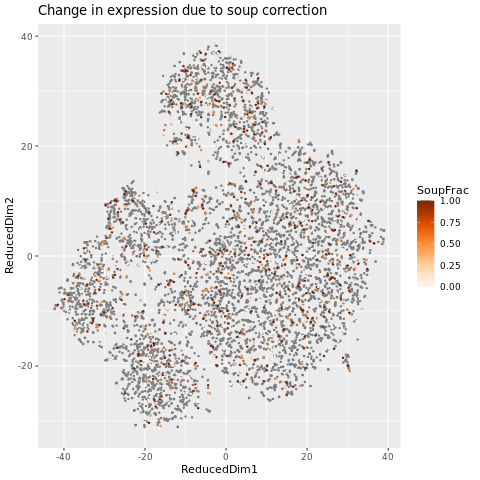

In [8]:
%%R
plotChangeMap(sce, out, "vsg-6-Tb427.BES15.12")

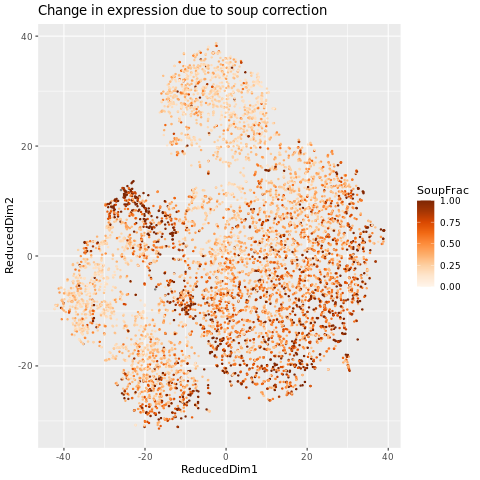

In [9]:
%%R
plotChangeMap(sce, out, "vsg-2-Tb427.BES40.22")

In [10]:
#%%R
#vsgGenes = c("vsg-6-Tb427.BES15.12", "vsg-2-Tb427.BES40.22")
#useToEst = estimateNonExpressingCells(sce, nonExpressedGeneList = list(vsgGenes = vsgGenes))
#sce = calculateContaminationFraction(sce, list(vsgGenes = vsgGenes), useToEst = useToEst)

In [11]:
#%%R
#sce = calculateContaminationFraction(sce, 
#                                     list(vsgGenes = vsgGenes), 
#                                     useToEst = useToEst, forceAccept=TRUE)

In [12]:
#%%R
#plotMarkerDistribution(sce)

# Load dataset

In [13]:
%%R
sce <- SingleCellExperiment(assays = list(counts = out))
sce

class: SingleCellExperiment 
dim: 11497 6762 
metadata(0):
assays(1): counts
rownames(11497): gene-Tb427.BES40.1 gene-Tb427.BES40.2 ... Tb11.1770
  Tb11.1800
rowData names(0):
colnames(6762): AAACCCAAGAGCATCG-1 AAACCCAAGTCCTGTA-1 ...
  TTTGTTGGTATCGAGG-1 TTTGTTGTCACTCACC-1
colData names(0):
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [14]:
%%R
assayNames(sce)

[1] "counts"


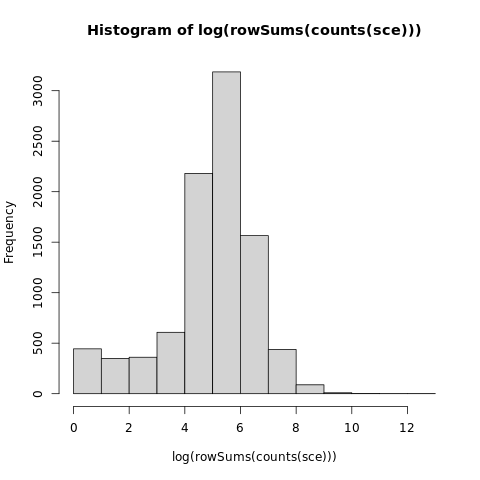

In [15]:
%%R
hist(log(rowSums(counts(sce))))

In [16]:
%%R
head(colSums(counts(sce))>25)

AAACCCAAGAGCATCG-1 AAACCCAAGTCCTGTA-1 AAACCCAAGTCGCCCA-1 AAACCCAAGTCGGCCT-1 
              TRUE               TRUE               TRUE               TRUE 
AAACCCACAATAGTGA-1 AAACCCACATATGGCT-1 
              TRUE               TRUE 


In [17]:
#%%R
#plotExprsFreqVsMean(sce)

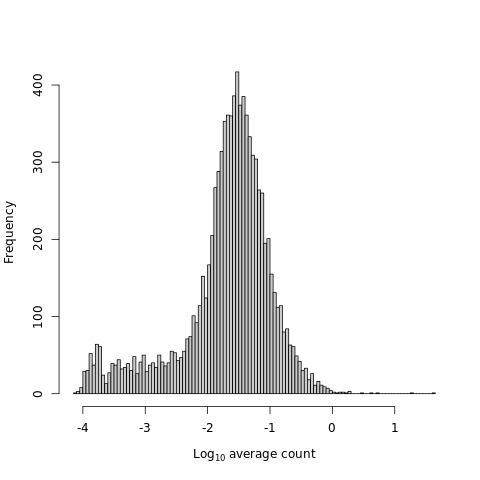

In [18]:
%%R
ave.counts <- calculateAverage(sce)
hist(log10(ave.counts), breaks=100, main="", col="grey80", 
    xlab=expression(Log[10]~"average count"))

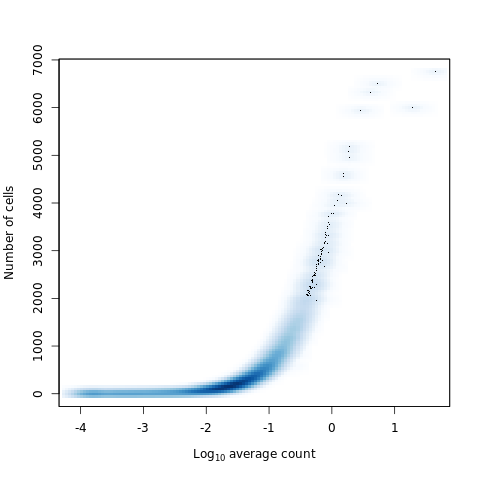

In [19]:
%%R
num.cells <- nexprs(sce, byrow=TRUE)
smoothScatter(log10(ave.counts), num.cells, ylab="Number of cells", 
    xlab=expression(Log[10]~"average count"))

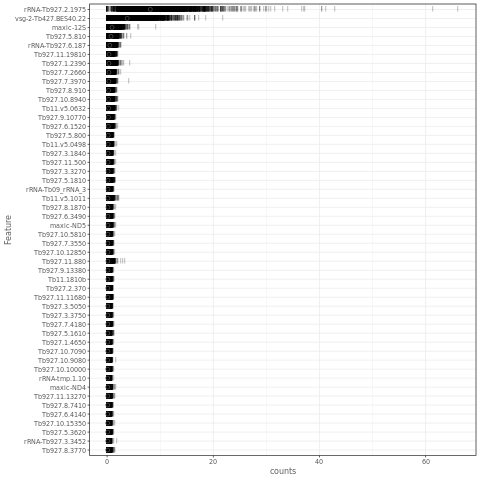

In [20]:
%%R
plotHighestExprs(sce,  as_percentage = TRUE)

# Add QC 
Default testing sum and detected transcripts plus:
- maxicircle
- ribosomal RNA
- VSGs

In [21]:
%%R
is.mito <- grepl("^maxic", rownames(sce))
is.vsg <- grepl("^vsg-", rownames(sce))
is.Ribo <-grepl("^rRNA-", rownames(sce)) 
df <- perCellQCMetrics(counts(sce), subsets=list(Mito=is.mito, VSG=is.vsg, Ribo=is.Ribo))
head(df)

DataFrame with 6 rows and 11 columns
                         sum  detected subsets_Mito_sum subsets_Mito_detected
                   <numeric> <integer>        <numeric>             <integer>
AAACCCAAGAGCATCG-1       415       310                4                     2
AAACCCAAGTCCTGTA-1       462       391               11                     7
AAACCCAAGTCGCCCA-1       729       574                4                     2
AAACCCAAGTCGGCCT-1       674       479               12                     3
AAACCCACAATAGTGA-1       610       457               12                     5
AAACCCACATATGGCT-1       449       340                4                     1
                   subsets_Mito_percent subsets_VSG_sum subsets_VSG_detected
                              <numeric>       <numeric>            <integer>
AAACCCAAGAGCATCG-1             0.963855              13                    1
AAACCCAAGTCCTGTA-1             2.380952               0                    0
AAACCCAAGTCGCCCA-1             

In [22]:
#%%R
#sce <- perCellQCMetrics(sce, subsets=list(vsg=is.vsg, Mt=is.mito, Ribo=is.Ribo))

#par(mfrow=c(2,2), mar=c(5.1, 4.1, 0.1, 0.1))
#hist(sce$total_counts/1e3, xlab="Library sizes (thousands)", main="", 
#    breaks=20, col="grey80", ylab="Number of cells")
#hist(sce$total_features, xlab="Number of expressed genes", main="", 
#    breaks=20, col="grey80", ylab="Number of cells")
#hist(sce$pct_counts_Ribo, xlab="ERCC proportion (%)",
#    ylab="Number of cells", breaks=20, main="", col="grey80")
#hist(sce$pct_counts_Mt, xlab="Mitochondrial proportion (%)", 
#    ylab="Number of cells", breaks=20, main="", col="grey80")


In [23]:
#%%R
#sce$pct_counts_Ribo

In [24]:
#%%R
#sum(is.Ribo)

# Test x outlayers

In [25]:
%%R
# not too high / not too low
qc.lib2 <- isOutlier(df$sum, nmads = 1, log=TRUE, type="lower")
qc.lib2b <- isOutlier(df$sum, nmads = 3, log=TRUE, type="higher")
qc.nexprs2 <- isOutlier(df$detected, nmads = 1, log=TRUE, type="lower")
qc.vsg2 <- isOutlier(df$subsets_VSG_percent, nmads = 1, type="lower")

# not too high
qc.mito2 <- isOutlier(df$subsets_Mito_percent, nmads = 2, type="higher")
qc.ribo2 <- isOutlier(df$subsets_Ribo_percent, nmads = 2, type="higher")

discard2 <- qc.lib2 | qc.nexprs2 | qc.mito2 | qc.ribo2 | qc.vsg2 | qc.lib2b
sum(discard2)

[1] 2050


## add discarded info to the sce object

In [26]:
%R sce$discard_mito <- qc.mito2
%R sce$discard_sum <- qc.lib2
%R sce$discard_sum2 <- qc.lib2b
%R sce$discard_detect <- qc.nexprs2
%R sce$discard_vsg <- qc.vsg2
%R sce$discard_ribo <- qc.ribo2

%R sce$discard_all <- discard2

1,1,1,...,0,0,1


## quick add qc to sce

In [27]:
%%R
sce <- addPerCellQC(sce, subsets=list(Mito=is.mito, VSG=is.vsg, Ribo=is.Ribo))
sce

class: SingleCellExperiment 
dim: 11497 6762 
metadata(0):
assays(1): counts
rownames(11497): gene-Tb427.BES40.1 gene-Tb427.BES40.2 ... Tb11.1770
  Tb11.1800
rowData names(0):
colnames(6762): AAACCCAAGAGCATCG-1 AAACCCAAGTCCTGTA-1 ...
  TTTGTTGGTATCGAGG-1 TTTGTTGTCACTCACC-1
colData names(19): discard_mito discard_sum ... subsets_Ribo_percent
  total
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [28]:
%%R
sce <- sce[, which(!discard2)]
sce

class: SingleCellExperiment 
dim: 11497 4712 
metadata(0):
assays(1): counts
rownames(11497): gene-Tb427.BES40.1 gene-Tb427.BES40.2 ... Tb11.1770
  Tb11.1800
rowData names(0):
colnames(4712): AAACCCAAGTCGGCCT-1 AAACCCACAATAGTGA-1 ...
  TTTGTTGCATGACTGT-1 TTTGTTGGTATCGAGG-1
colData names(19): discard_mito discard_sum ... subsets_Ribo_percent
  total
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [29]:
%%R
#is.vsg6 <- grepl("^vsg-6-", rownames(sce))
#is.vsg8 <- grepl("^vsg-8-", rownames(sce))
#is.vsg15 <- grepl("^vsg-15-", rownames(sce))
#is.vsg17 <- grepl("^vsg-17-", rownames(sce))
is.vsg <- grepl("^vsg-", rownames(sce))
#is.vsg <- is.vsg6 | is.vsg8 | is.vsg15 | is.vsg17 | is.vsg2

In [30]:
%%R

#is.vsg <- grepl("^vsg-", rownames(sce))
sce_vsg <- sce[which(is.vsg), ]
sce_vsg
#sce_vsg <- SingleCellExperiment(assays = list(counts = counts(sce_vsg))

#sce_vsg

class: SingleCellExperiment 
dim: 22 4712 
metadata(0):
assays(1): counts
rownames(22): vsg-2-Tb427.BES40.22 vsg-9-Tb427.BES129.14 ...
  vsg-mes-Tb427VSG-559 vsg-mes-Tb427VSG-3591
rowData names(0):
colnames(4712): AAACCCAAGTCGGCCT-1 AAACCCACAATAGTGA-1 ...
  TTTGTTGCATGACTGT-1 TTTGTTGGTATCGAGG-1
colData names(19): discard_mito discard_sum ... subsets_Ribo_percent
  total
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [31]:
%%R
test <- as.matrix(counts(sce_vsg))
write.table(test,file=paste("temp_count_vsg_vex1_2.csv",sep=''),sep = ",")


In [32]:
temp_count = pd.read_csv('temp_count_vsg_vex1_2.csv')
temp_count.head()

,AAACCCAAGTCGGCCT-1,AAACCCACAATAGTGA-1,AAACCCACATATGGCT-1,AAACCCAGTCCGTTTC-1,AAACCCATCTTCTGTA-1,AAACGAAAGAAAGCGA-1,AAACGAACAGGTCAGA-1,AAACGAACATAGGTAA-1,AAACGAAGTACAGTAA-1,AAACGAAGTAGATCGG-1,...,TTTGGAGCAAGCTGCC-1,TTTGGTTAGGCTTAAA-1,TTTGGTTCAACTCATG-1,TTTGGTTCACGGGTAA-1,TTTGGTTGTCGGAAAC-1,TTTGGTTGTGCTGCAC-1,TTTGTTGAGCCGATAG-1,TTTGTTGCAACGGGTA-1,TTTGTTGCATGACTGT-1,TTTGTTGGTATCGAGG-1
vsg-2-Tb427.BES40.22,36,49,18,18,48,10,9,52,111,6,...,93,86,19,17,6,20,67,28,18,10
vsg-9-Tb427.BES129.14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vsg-6-Tb427.BES15.12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vsg-21-Tb427.BES28.15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vsg-18-Tb427.BES98.12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
temp_count.sum(axis=1).sort_values()

vsg-9-Tb427.BES129.14          0
vsg-19-Tb427.BES10.10          0
vsg-mes-Tb427VSG-559           0
vsg-mes-Tb427VSG-639           2
vsg-13-Tb427.BES51.12          7
vsg-18-Tb427.BES98.12          9
vsg-mes-Tb427VSG-1954         24
vsg-mes-Tb427VSG-636          26
vsg-mes-Tb427VSG-653          32
vsg-16-Tb427.BES122.11        33
vsg-21-Tb427.BES28.15         33
vsg-mes-Tb427VSG-3591         80
vsg-mes-Tb427VSG-397         108
vsg-11-Tb427.BES126.15       131
vsg-3-Tb427.BES65.13         221
vsg-14-Tb427.BES64.2         223
vsg-mes-Tb427VSG-531         240
vsg-15-Tb427.BES134.6        366
vsg-17-Tb427.BES56.13        593
vsg-6-Tb427.BES15.12         930
vsg-8-Tb427.BES29.9         2743
vsg-2-Tb427.BES40.22      112625
dtype: int64

In [34]:
#is.vsg16 <- grepl("^vsg-16-", rownames(sce_vsg))
#is.vsg21 <- grepl("^vsg-21-", rownames(sce_vsg))
#is.mes639 <- grepl("^vsg-mes-Tb427VSG-639", rownames(sce_vsg))
##is.mes636 <- grepl("^vsg-mes-Tb427VSG-636", rownames(sce_vsg))
#| is.vsg16 | is.vsg21 | is.mes639 | is.mes636

In [35]:
'''
%%R

is.vsg16 <- grepl("^vsg-16-", rownames(sce_vsg))
is.vsg19 <- grepl("^vsg-19-", rownames(sce_vsg))
is.vsg21 <- grepl("^vsg-21-", rownames(sce_vsg))
is.mes559 <- grepl("^vsg-mes-Tb427VSG-559", rownames(sce_vsg))
is.mes639 <- grepl("^vsg-mes-Tb427VSG-639", rownames(sce_vsg))
is.mes636 <- grepl("^vsg-mes-Tb427VSG-636", rownames(sce_vsg))
is.vsg9 <- grepl("^vsg-9-", rownames(sce_vsg))
is.vsg13 <- grepl("^vsg-13-", rownames(sce_vsg))
is.vsg18 <- grepl("^vsg-18-", rownames(sce_vsg))


discard <- is.vsg16  | is.vsg19  | is.vsg21 | is.mes559 | is.mes639 | is.mes636 | is.vsg9 | is.vsg13 | is.vsg18 

retain <- !discard
head(retain)

sce_vsg <- sce_vsg[which(retain), ]
sce_vsg
'''

'\n%%R\n\nis.vsg16 <- grepl("^vsg-16-", rownames(sce_vsg))\nis.vsg19 <- grepl("^vsg-19-", rownames(sce_vsg))\nis.vsg21 <- grepl("^vsg-21-", rownames(sce_vsg))\nis.mes559 <- grepl("^vsg-mes-Tb427VSG-559", rownames(sce_vsg))\nis.mes639 <- grepl("^vsg-mes-Tb427VSG-639", rownames(sce_vsg))\nis.mes636 <- grepl("^vsg-mes-Tb427VSG-636", rownames(sce_vsg))\nis.vsg9 <- grepl("^vsg-9-", rownames(sce_vsg))\nis.vsg13 <- grepl("^vsg-13-", rownames(sce_vsg))\nis.vsg18 <- grepl("^vsg-18-", rownames(sce_vsg))\n\n\ndiscard <- is.vsg16  | is.vsg19  | is.vsg21 | is.mes559 | is.mes639 | is.mes636 | is.vsg9 | is.vsg13 | is.vsg18 \n\nretain <- !discard\nhead(retain)\n\nsce_vsg <- sce_vsg[which(retain), ]\nsce_vsg\n'

In [36]:
'''
%%R
keep_feature <- colSums(counts(sce_vsg)) > 25
sce_vsg <- sce_vsg[, keep_feature]
sce_vsg
'''

'\n%%R\nkeep_feature <- colSums(counts(sce_vsg)) > 25\nsce_vsg <- sce_vsg[, keep_feature]\nsce_vsg\n'

In [37]:
%%R
#sce_vsg <- SingleCellExperiment(assays = list(counts = as.matrix(counts(sce_vsg)))
sce_vsg

class: SingleCellExperiment 
dim: 22 4712 
metadata(0):
assays(1): counts
rownames(22): vsg-2-Tb427.BES40.22 vsg-9-Tb427.BES129.14 ...
  vsg-mes-Tb427VSG-559 vsg-mes-Tb427VSG-3591
rowData names(0):
colnames(4712): AAACCCAAGTCGGCCT-1 AAACCCACAATAGTGA-1 ...
  TTTGTTGCATGACTGT-1 TTTGTTGGTATCGAGG-1
colData names(19): discard_mito discard_sum ... subsets_Ribo_percent
  total
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [38]:
%%R
saveRDS(sce_vsg, paste("sce_vsg_vex1_2.rds",sep=''))

In [39]:
%%R
keep_feature <- colSums(counts(sce_vsg)) > 45
sce_vsg <- sce_vsg[, keep_feature]
sce_vsg

class: SingleCellExperiment 
dim: 22 708 
metadata(0):
assays(1): counts
rownames(22): vsg-2-Tb427.BES40.22 vsg-9-Tb427.BES129.14 ...
  vsg-mes-Tb427VSG-559 vsg-mes-Tb427VSG-3591
rowData names(0):
colnames(708): AAACCCACAATAGTGA-1 AAACCCATCTTCTGTA-1 ...
  TTTGGTTAGGCTTAAA-1 TTTGTTGAGCCGATAG-1
colData names(19): discard_mito discard_sum ... subsets_Ribo_percent
  total
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [10]:
2544+3084+1677+708

8013

In [40]:
#%%R
#test <- as.matrix(counts(sce_vsg))
#write.table(test,file=paste("new_count_vsg_vex2_1_681517.csv",sep=''),sep = ",")



In [41]:
%%R
#clust.sce <- quickCluster(sce_vsg)
sce_vsg <- computeSumFactors(sce_vsg)#, cluster=clust.sce, min.mean=0.1)
sce_vsg <- logNormCounts(sce_vsg)
assayNames(sce_vsg)

[1] "counts"    "logcounts"


In [45]:
%%R
test <- as.matrix(counts(sce_vsg))
write.table(test,file=paste("new_count_vsg_vex1_2.csv",sep=''),sep = ",")



In [46]:
%%R
test <- as.matrix(logcounts(sce_vsg))
write.table(test,file=paste("new_count_vsg_vex1_2_norm.csv",sep=''),sep = ",")



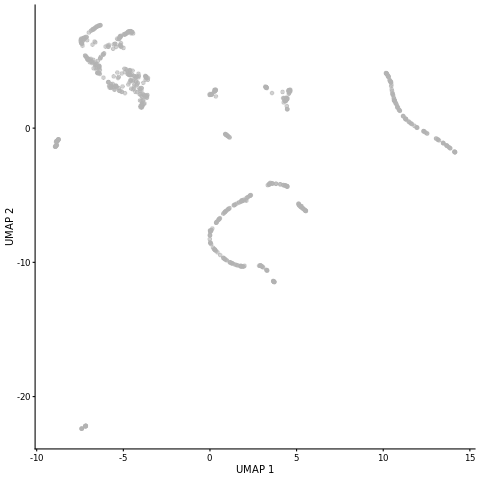

In [47]:
%%R
sce_vsg <- runUMAP(sce_vsg)
#sce_vsg
plotReducedDim(sce_vsg, dimred="UMAP")

In [48]:
%%R
library(bluster)
#clust.5 <- clusterCells(sce.pbmc, use.dimred="PCA", )


#nn.clusters <- clusterCells(sce_vsg, use.dimred="UMAP")
nn.clusters <- clusterCells(sce_vsg, assay.type='logcounts', BLUSPARAM=NNGraphParam(k=25))
table(nn.clusters)


nn.clusters
  1   2   3   4   5   6   7   8   9 
 81  90  67  57 155  51 132  38  37 


## Plot Cluster
- here an attempt to use log counts for clustering.
- the cluster are visualized using umap 


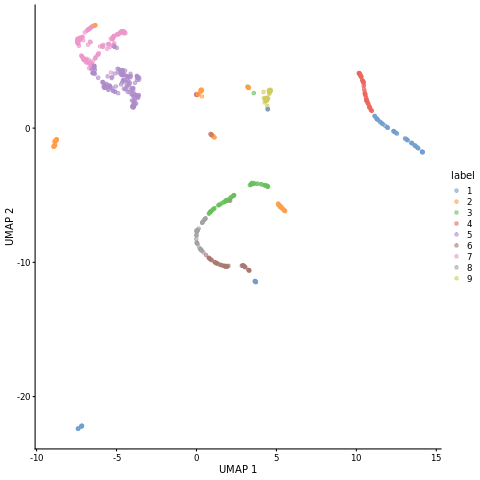

In [49]:
%%R
colLabels(sce_vsg) <- nn.clusters
plotReducedDim(sce_vsg, "UMAP", colour_by="label")

## Plot z-score
here we compute and plot z scores for each vsgs

R[write to console]: 
Attaching package: 'celda'


R[write to console]: The following objects are masked from 'package:scater':

    normalizeCounts, plotHeatmap


R[write to console]: The following object is masked from 'package:scuttle':

    normalizeCounts


R[write to console]: The following object is masked from 'package:S4Vectors':

    params




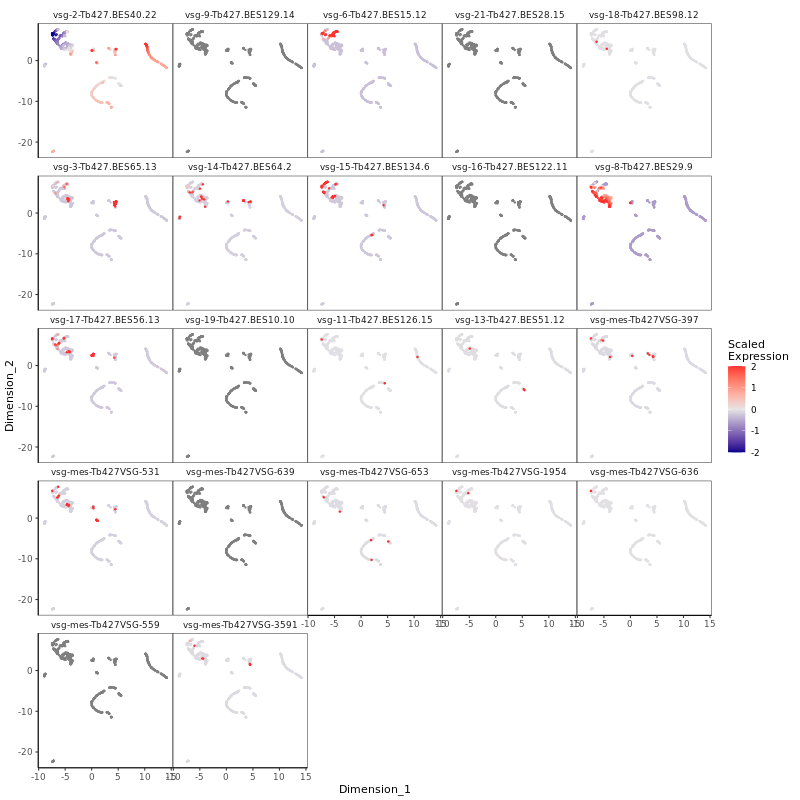

In [50]:
%%R -w 800 -h 800
library(celda)
umap <- reducedDim(sce_vsg, "UMAP")
plotDimReduceFeature(as.matrix(logcounts(sce_vsg)),
    dim1 = umap[, 1],
    dim2 = umap[, 2],
    features = rownames(sce_vsg),#c('vsg-2-Tb427.BES40.22', 'vsg-6-Tb427.BES15.12'),
    exactMatch = TRUE)

## Plot log counts
here we plot the log counts of the vsgs withput scaling

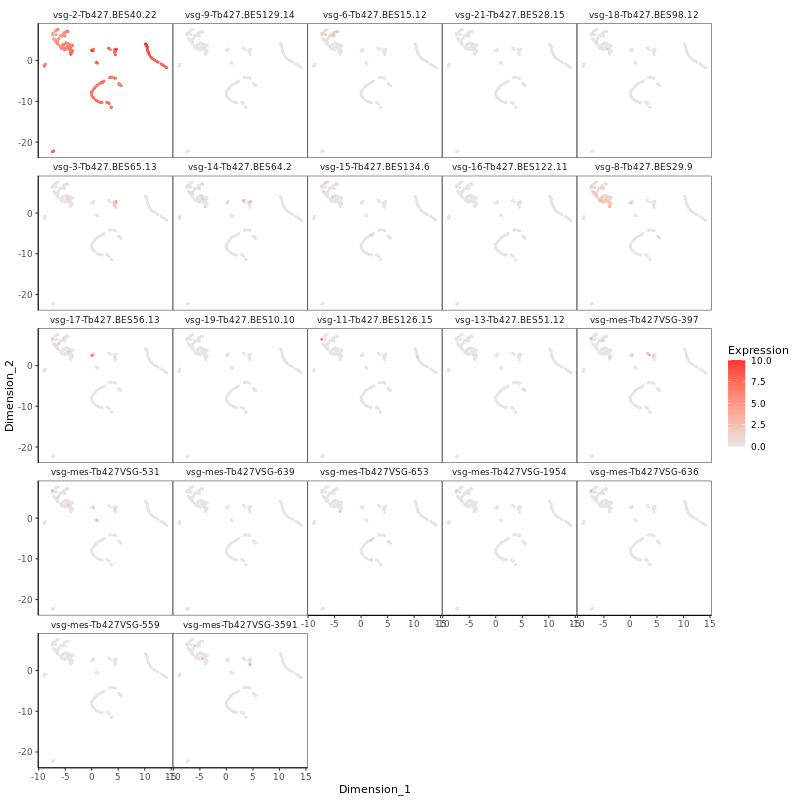

In [51]:
%%R -w 800 -h 800
library(celda)
umap <- reducedDim(sce_vsg, "UMAP")
plotDimReduceFeature(as.matrix(logcounts(sce_vsg)),
    dim1 = umap[, 1],
    dim2 = umap[, 2],
    features = rownames(sce_vsg),#c('vsg-2-Tb427.BES40.22', 'vsg-6-Tb427.BES15.12'),
    exactMatch = TRUE,
    zscore=FALSE,
    trim = c(0, 10),                 
    limits = c(0, 10),)

In [52]:
%%R
max(logcounts(sce_vsg))

[1] 14.75694


In [53]:
%%R
head(colLabels(sce_vsg))

[1] 4 3 7 5 7 6
Levels: 1 2 3 4 5 6 7 8 9


In [54]:
%%R
rd<-reducedDim(sce_vsg, "UMAP")[,1:2]

In [55]:
%R -o rd
umap = pd.DataFrame(rd)
umap.columns = ['comp1','comp2']



In [56]:
%%R
lab<-colLabels(sce_vsg)
head(lab)

[1] 4 3 7 5 7 6
Levels: 1 2 3 4 5 6 7 8 9


In [57]:
%R -o lab
umap = pd.concat([pd.read_csv('new_count_vsg_vex1_2_norm.csv').T.reset_index(),umap],axis=1)
umap=umap.set_index('index')
umap['clusters']=list(lab)
umap.to_csv('new_count_vsg_vex1_2_norm.csv')
umap.head()



,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-531,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters
index,,,,,,,,,,,,,,,,,,,,,
AAACCCACAATAGTGA-1,9.387856,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066402,2.499921,4
AAACCCATCTTCTGTA-1,7.092507,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.889263,-6.209695,3
AAACGAACATAGGTAA-1,4.543672,0.0,0.0,0.0,0.0,0.0,0.0,0.894194,0.0,1.442090,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.084458,5.145591,7
AAACGAAGTACAGTAA-1,7.562260,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.429597,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.775119,1.836348,5
AAAGAACCATGAGAAT-1,4.822199,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.857582,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.715941,4.457271,7


In [58]:
%R -o rd
umap = pd.DataFrame(rd)
umap.columns = ['comp1','comp2']

In [59]:
%R -o lab
umap = pd.concat([pd.read_csv("new_count_vsg_vex1_2.csv").T.reset_index(),umap],axis=1)
umap=umap.set_index('index')
umap['clusters']=list(lab)
umap.to_csv("new_count_vsg_vex1_2.csv")
umap.head()




,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-531,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters
index,,,,,,,,,,,,,,,,,,,,,
AAACCCACAATAGTGA-1,49,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.066402,2.499921,4
AAACCCATCTTCTGTA-1,48,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.889263,-6.209695,3
AAACGAACATAGGTAA-1,52,0,0,0,0,0,0,2,0,4,...,0,0,0,0,0,0,0,-7.084458,5.145591,7
AAACGAAGTACAGTAA-1,111,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,-3.775119,1.836348,5
AAAGAACCATGAGAAT-1,52,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,-6.715941,4.457271,7


In [60]:
%%R
count_feature <- colSums(counts(sce_vsg)>0)


## Plot umap vsg size
The umap is color coded by the number ov vsgs expressed in each cell
The center yellow blob show the cell expressin all 5 vsgs

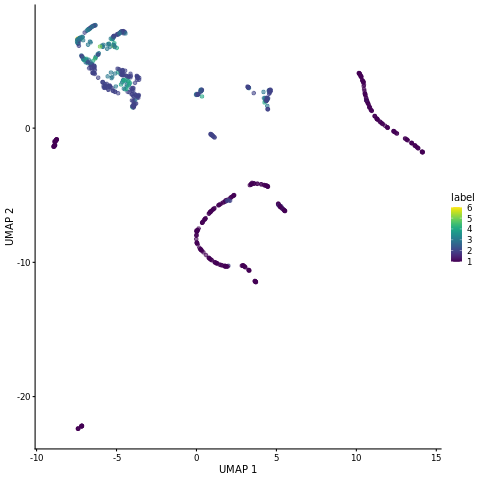

In [61]:
%%R
colLabels(sce_vsg) <- count_feature
plotReducedDim(sce_vsg, "UMAP", colour_by="label")

In [62]:
#%%R
#is.vsg6_8 <- is.vsg6 | is.vsg8 
#is.other <- is.vsg15 | is.vsg17 | is.vsg2
#is.vsg6_8 <- is.vsg6_8 & is.other 
umap.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-531,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters
index,,,,,,,,,,,,,,,,,,,,,
AAACCCACAATAGTGA-1,49,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.066402,2.499921,4
AAACCCATCTTCTGTA-1,48,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.889263,-6.209695,3
AAACGAACATAGGTAA-1,52,0,0,0,0,0,0,2,0,4,...,0,0,0,0,0,0,0,-7.084458,5.145591,7
AAACGAAGTACAGTAA-1,111,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,-3.775119,1.836348,5
AAAGAACCATGAGAAT-1,52,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,-6.715941,4.457271,7


In [63]:
umap.sum().drop(['comp1','comp2','clusters']).sort_values()

vsg-16-Tb427.BES122.11        0
vsg-9-Tb427.BES129.14         0
vsg-21-Tb427.BES28.15         0
vsg-19-Tb427.BES10.10         0
vsg-mes-Tb427VSG-559          0
vsg-mes-Tb427VSG-639          0
vsg-13-Tb427.BES51.12         3
vsg-18-Tb427.BES98.12         3
vsg-mes-Tb427VSG-653          7
vsg-mes-Tb427VSG-1954        14
vsg-mes-Tb427VSG-3591        19
vsg-mes-Tb427VSG-636         26
vsg-14-Tb427.BES64.2         43
vsg-11-Tb427.BES126.15       51
vsg-3-Tb427.BES65.13         58
vsg-mes-Tb427VSG-531         66
vsg-mes-Tb427VSG-397         67
vsg-15-Tb427.BES134.6        77
vsg-17-Tb427.BES56.13       115
vsg-6-Tb427.BES15.12        204
vsg-8-Tb427.BES29.9         575
vsg-2-Tb427.BES40.22      44351
dtype: object

In [64]:
select = umap.drop(['comp1','comp2','clusters'],axis=1)
select.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-11-Tb427.BES126.15,vsg-13-Tb427.BES51.12,vsg-mes-Tb427VSG-397,vsg-mes-Tb427VSG-531,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591
index,,,,,,,,,,,,,,,,,,,,,
AAACCCACAATAGTGA-1,49,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCATCTTCTGTA-1,48,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACGAACATAGGTAA-1,52,0,0,0,0,0,0,2,0,4,...,0,0,0,0,0,0,0,0,0,0
AAACGAAGTACAGTAA-1,111,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
AAAGAACCATGAGAAT-1,52,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0


In [65]:
vsg_class = []
for n in range(select.shape[0]):
    temp = select.iloc[n]
    temp = temp[temp>0]
    temp = list(temp.index)
    temp.sort()
    #print(temp)
    temp = [b for b in temp if b not in ['comp1','comp2']]
    temp.sort()
    temp=tuple(temp)
    vsg_class.append(temp)
    
    

umap['vsg_class'] = vsg_class
umap['size_class'] = [len(n) for n in  umap['vsg_class']]
umap.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,vsg_class,size_class
index,,,,,,,,,,,,,,,,,,,,,
AAACCCACAATAGTGA-1,49,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.066402,2.499921,4,"(vsg-17-Tb427.BES56.13, vsg-2-Tb427.BES40.22)",2
AAACCCATCTTCTGTA-1,48,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.889263,-6.209695,3,"(vsg-2-Tb427.BES40.22,)",1
AAACGAACATAGGTAA-1,52,0,0,0,0,0,0,2,0,4,...,0,0,0,0,0,-7.084458,5.145591,7,"(vsg-15-Tb427.BES134.6, vsg-2-Tb427.BES40.22, ...",3
AAACGAAGTACAGTAA-1,111,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,-3.775119,1.836348,5,"(vsg-2-Tb427.BES40.22, vsg-8-Tb427.BES29.9)",2
AAAGAACCATGAGAAT-1,52,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,-6.715941,4.457271,7,"(vsg-2-Tb427.BES40.22, vsg-8-Tb427.BES29.9)",2


In [66]:
umap.vsg_class.value_counts().head(10)
#(vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12) 

(vsg-2-Tb427.BES40.22,)                                               318
(vsg-2-Tb427.BES40.22, vsg-8-Tb427.BES29.9)                           138
(vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12)                           29
(vsg-2-Tb427.BES40.22, vsg-3-Tb427.BES65.13)                           28
(vsg-17-Tb427.BES56.13, vsg-2-Tb427.BES40.22)                          21
(vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12, vsg-8-Tb427.BES29.9)      18
(vsg-15-Tb427.BES134.6, vsg-2-Tb427.BES40.22, vsg-8-Tb427.BES29.9)     16
(vsg-2-Tb427.BES40.22, vsg-mes-Tb427VSG-531)                           13
(vsg-14-Tb427.BES64.2, vsg-2-Tb427.BES40.22)                           13
(vsg-15-Tb427.BES134.6, vsg-2-Tb427.BES40.22)                          13
Name: vsg_class, dtype: int64

In [67]:
umap.size_class.value_counts()

1    318
2    267
3     91
4     28
5      3
6      1
Name: size_class, dtype: int64

In [68]:
umap.to_csv("new_count_vsg_vex1_2.csv")
umap.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,vsg_class,size_class
index,,,,,,,,,,,,,,,,,,,,,
AAACCCACAATAGTGA-1,49,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.066402,2.499921,4,"(vsg-17-Tb427.BES56.13, vsg-2-Tb427.BES40.22)",2
AAACCCATCTTCTGTA-1,48,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.889263,-6.209695,3,"(vsg-2-Tb427.BES40.22,)",1
AAACGAACATAGGTAA-1,52,0,0,0,0,0,0,2,0,4,...,0,0,0,0,0,-7.084458,5.145591,7,"(vsg-15-Tb427.BES134.6, vsg-2-Tb427.BES40.22, ...",3
AAACGAAGTACAGTAA-1,111,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,-3.775119,1.836348,5,"(vsg-2-Tb427.BES40.22, vsg-8-Tb427.BES29.9)",2
AAAGAACCATGAGAAT-1,52,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,-6.715941,4.457271,7,"(vsg-2-Tb427.BES40.22, vsg-8-Tb427.BES29.9)",2


In [69]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('new_count_vsg_vex1_2.csv',index_col =[0])
df.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,vsg_class,size_class
index,,,,,,,,,,,,,,,,,,,,,
AAACCCACAATAGTGA-1,49,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.066402,2.499921,4,"('vsg-17-Tb427.BES56.13', 'vsg-2-Tb427.BES40.22')",2
AAACCCATCTTCTGTA-1,48,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.889263,-6.209695,3,"('vsg-2-Tb427.BES40.22',)",1
AAACGAACATAGGTAA-1,52,0,0,0,0,0,0,2,0,4,...,0,0,0,0,0,-7.084458,5.145591,7,"('vsg-15-Tb427.BES134.6', 'vsg-2-Tb427.BES40.2...",3
AAACGAAGTACAGTAA-1,111,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,-3.775119,1.836348,5,"('vsg-2-Tb427.BES40.22', 'vsg-8-Tb427.BES29.9')",2
AAAGAACCATGAGAAT-1,52,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,-6.715941,4.457271,7,"('vsg-2-Tb427.BES40.22', 'vsg-8-Tb427.BES29.9')",2


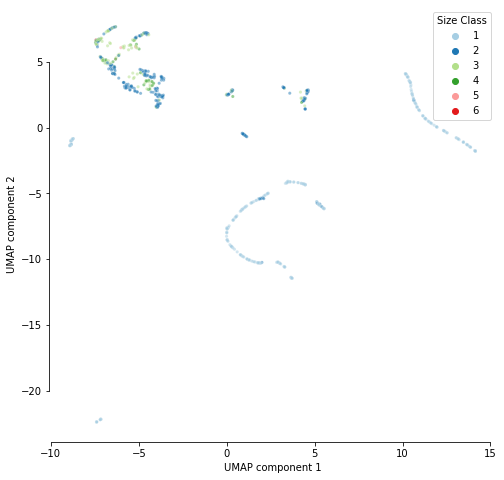

In [70]:
fig,ax=plt.subplots(figsize=(8,8))
sns.scatterplot(data=df, x='comp1',y='comp2', hue='size_class', ax=ax,
                alpha=0.5, s=10,palette ='Paired')
ax.legend(title='Size Class')
ax.set_xlabel('UMAP component 1')   
ax.set_ylabel('UMAP component 2')
sns.despine(fig,trim=True)